<a href="https://colab.research.google.com/github/guillerZeva/Proyecto-WordCloud/blob/main/WORDCLOUD_etiquetas_stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Istalación del paquete que WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
!pip install pandas

In [2]:
from bs4 import BeautifulSoup as bs
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

###Métodos para el scraping

In [1]:
def ingresarBuscar():
  id_user = input("Ingrese el ID: ")
  url = "https://es.stackoverflow.com/users/" + id_user +"?tab=tags"
  res = requests.get(url)
  soup = bs(res.content)
  return soup

def scraping():
  soup = None
  etiquetas = []
  replicas = [] 

#Validar usuario existente 
  while True:
    soup = ingresarBuscar()
    valida = soup.find('div', class_='grid grid__center w100 h100')
    if valida != None:
      print("Ese usuario no existe")
    else:
      etiquetas = soup.find_all('a', class_= 'post-tag')
      replicas = soup.find_all('span', class_= 'item-multiplier-count')
      
#Validar que el usuario tenga suficiente etiquetas
      if len(etiquetas) == 0 or len(replicas) == 0:
        print("Este usuario no tiene suficiente etiquetas para generar un WordCloud")         
      else:
        break

  return etiquetas,replicas

###Organizar las etiquetas y las replicas en un diccionario  


In [3]:
def frecuenciaEtiquetas(etiquetas, replicas):
  frecuenciaDic = {}

  for i in range(len(etiquetas)):

    if  i < len(replicas):
      frecuenciaDic[etiquetas[i].get_text()] =  float(replicas[i].get_text())
    else:
      frecuenciaDic[etiquetas[i].get_text()] = 1

  return frecuenciaDic  

###Generar WordCloud

In [4]:
def createWordCloud(text):
  wc = WordCloud(
      width = 3000, 
      height = 2000, 
      max_font_size=2000, 
      scale=3, 
      background_color="#333333",
      colormap="spring",
      collocations=False,)
  
  wc.generate_from_frequencies(text)
 
 # Mostrar la imagen generada:
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()


###Ejecución 

Ingrese el ID: gfdgfdgfd
Ese usuario no existe
Ingrese el ID: 56
Este usuario no tiene suficiente etiquetas para generar un WordCloud
Ingrese el ID: 95


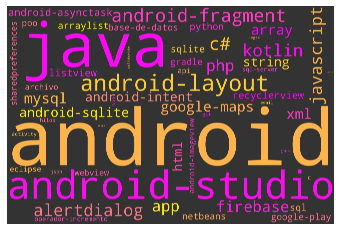

In [5]:
freEtiquetas = scraping()

frecuenciaDic = frecuenciaEtiquetas(freEtiquetas[0], freEtiquetas[1])

createWordCloud(frecuenciaDic)